***The aim of this project is to predict the likelihood of a patient having a stroke based on various input parameters. Stroke is identified as the second leading cause of death globally, responsible for approximately 11% of total deaths, according to the World Health Organization (WHO).***

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

The dataset used for this prediction task is sourced from Kaggle, specifically the "Stroke Prediction Dataset" by FEDESORIANO. It is important to note that this dataset is used solely for educational purposes. The dataset consists of 43,400 rows and 10 columns, where each row provides relevant information about a patient.

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/archive.zip")
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


**_Preprocessing_:**

In [ ]:
df.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
df=df.drop(["id","smoking_status"],axis=1)

The "smoking status" feature was dropped due to a high number of null values.

In [ ]:
df.corr() #for heatmap

<ipython-input-246-81eef4ba30ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #for heatmap


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.272169,0.250188,0.237627,0.358897,0.156049
hypertension,0.272169,1.000000,0.119777,0.160211,0.161225,0.075332
heart_disease,0.250188,0.119777,1.000000,0.146938,0.057677,0.113763
avg_glucose_level,0.237627,0.160211,0.146938,1.000000,0.191295,0.078917
bmi,0.358897,0.161225,0.057677,0.191295,1.000000,0.020285
stroke,0.156049,0.075332,0.113763,0.078917,0.020285,1.000000


<Axes: >

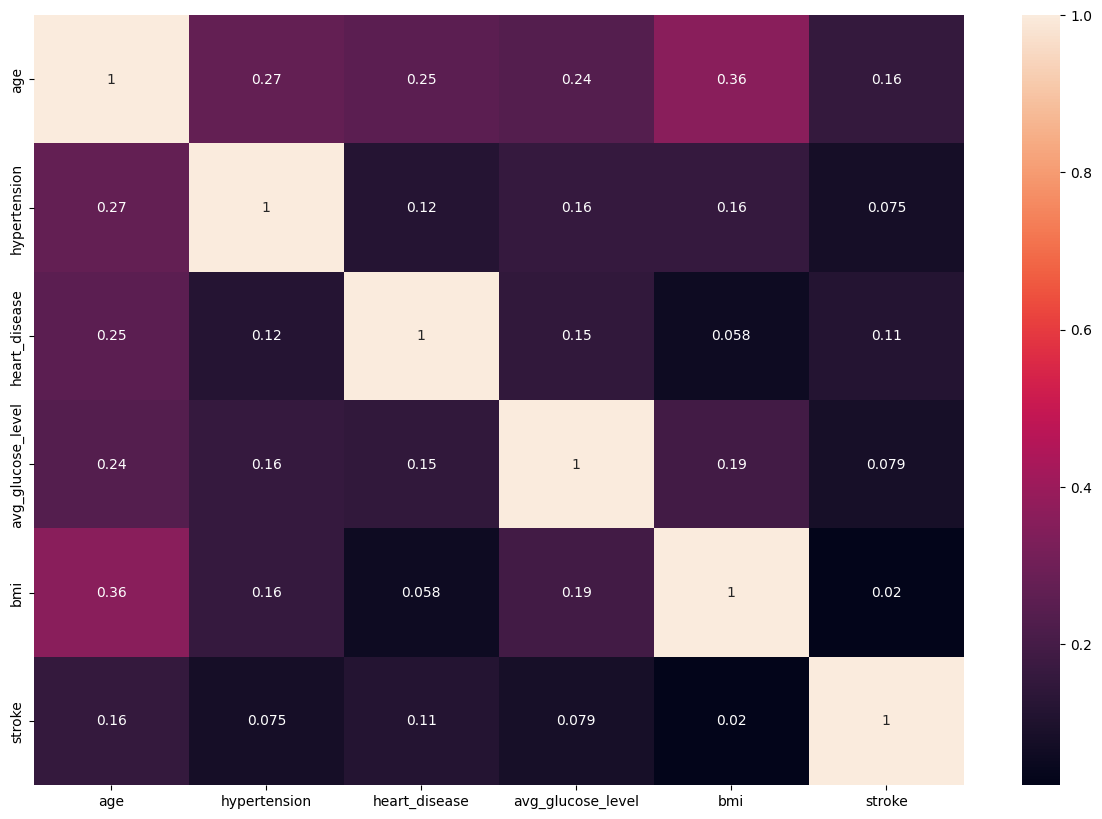

In [ ]:
plt.figure(figsize=[15,10])
warnings.filterwarnings("ignore")
sns.heatmap(df.corr(),annot=True)#heatmap based on corelation betveen variables

In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [ ]:
le=LabelEncoder()
lst=["gender","ever_married","work_type","Residence_type"]
for i in lst:
  df[i]=le.fit_transform(df[i])

*The categorical features such as "gender," "ever_married," "work_type," and "residence_type" were label encoded.*

In [ ]:
df["stroke"].value_counts()  #how many people in this dataset got stroke

0    42617
1      783
Name: stroke, dtype: int64

In [ ]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
stroke                  0
dtype: int64

In [ ]:
df.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
stroke                 int64
dtype: object

In [ ]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mode()[0])


* To prepare the data for modeling, missing values in the "bmi" feature were filled using the mode value.*

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3,test_size=0.3)

The dataset was split into training and testing sets using a test size of 0.3 and a random state of 3.

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,3.0,0,0,0,4,0,95.12,18.0,0
1,1,58.0,1,0,1,2,1,87.96,39.2,0
2,0,8.0,0,0,0,2,1,110.89,17.6,0
3,0,70.0,0,0,1,2,0,69.04,35.9,0
4,1,14.0,0,0,0,1,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0,0,0,4,1,58.64,20.4,0
43396,0,56.0,0,0,1,0,1,213.61,55.4,0
43397,0,82.0,1,0,1,2,1,91.94,28.9,0
43398,1,40.0,0,0,1,2,1,99.16,33.2,0


**Standardization was applied using the StandardScaler from scikit-learn to ensure that all features have the same scale.**

******************** SVC(kernel='poly') ********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12790
           1       0.00      0.00      0.00       230

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020

******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     12790
           1       0.08      0.38      0.13       230

    accuracy                           0.91     13020
   macro avg       0.53      0.65      0.54     13020
weighted avg       0.97      0.91      0.94     13020

******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12790
           1       0.10      0.00      0.01       230

 

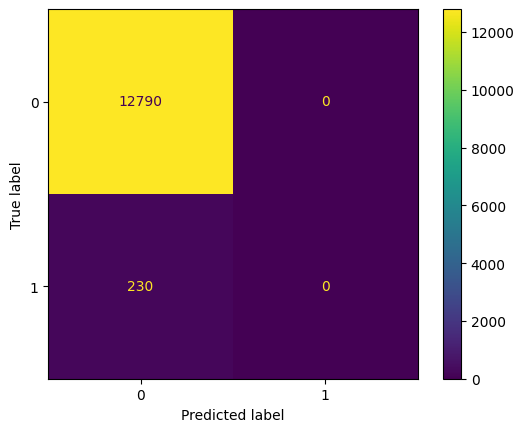

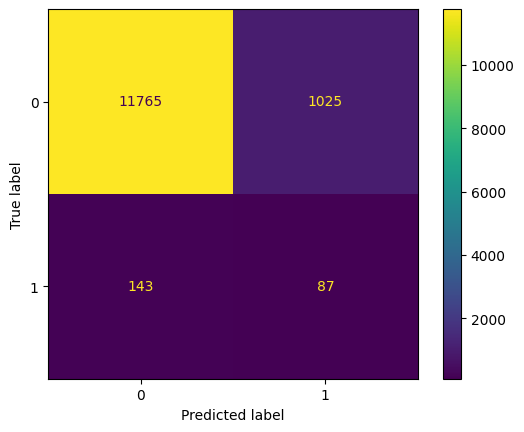

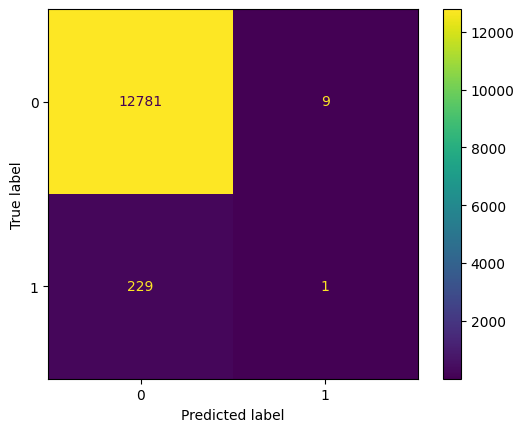

In [ ]:
sv=SVC(kernel="poly")
gs=GaussianNB()
knn=KNeighborsClassifier()
lst1=[sv,gs,knn]
for i in lst1:
 print("*"*20,i,"*"*20)
 i.fit(X_train,y_train)
 y_pred=i.predict(X_test)
 print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
 print(classification_report(y_test,y_pred))

 The performance of the models was evaluated using classification report and ConfusionMatrixDisplay from scikit-learn's metrics module.



**`jointplot`**

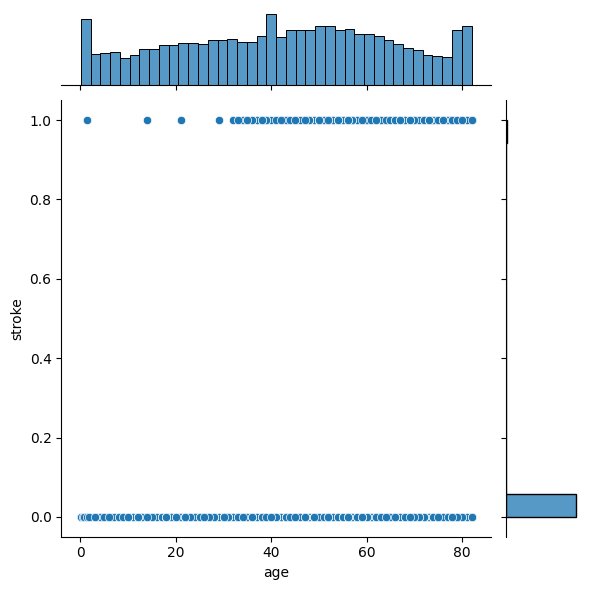

In [ ]:
sns.jointplot(x="age",y="stroke",data=df)# How many people get stroke on the particular age

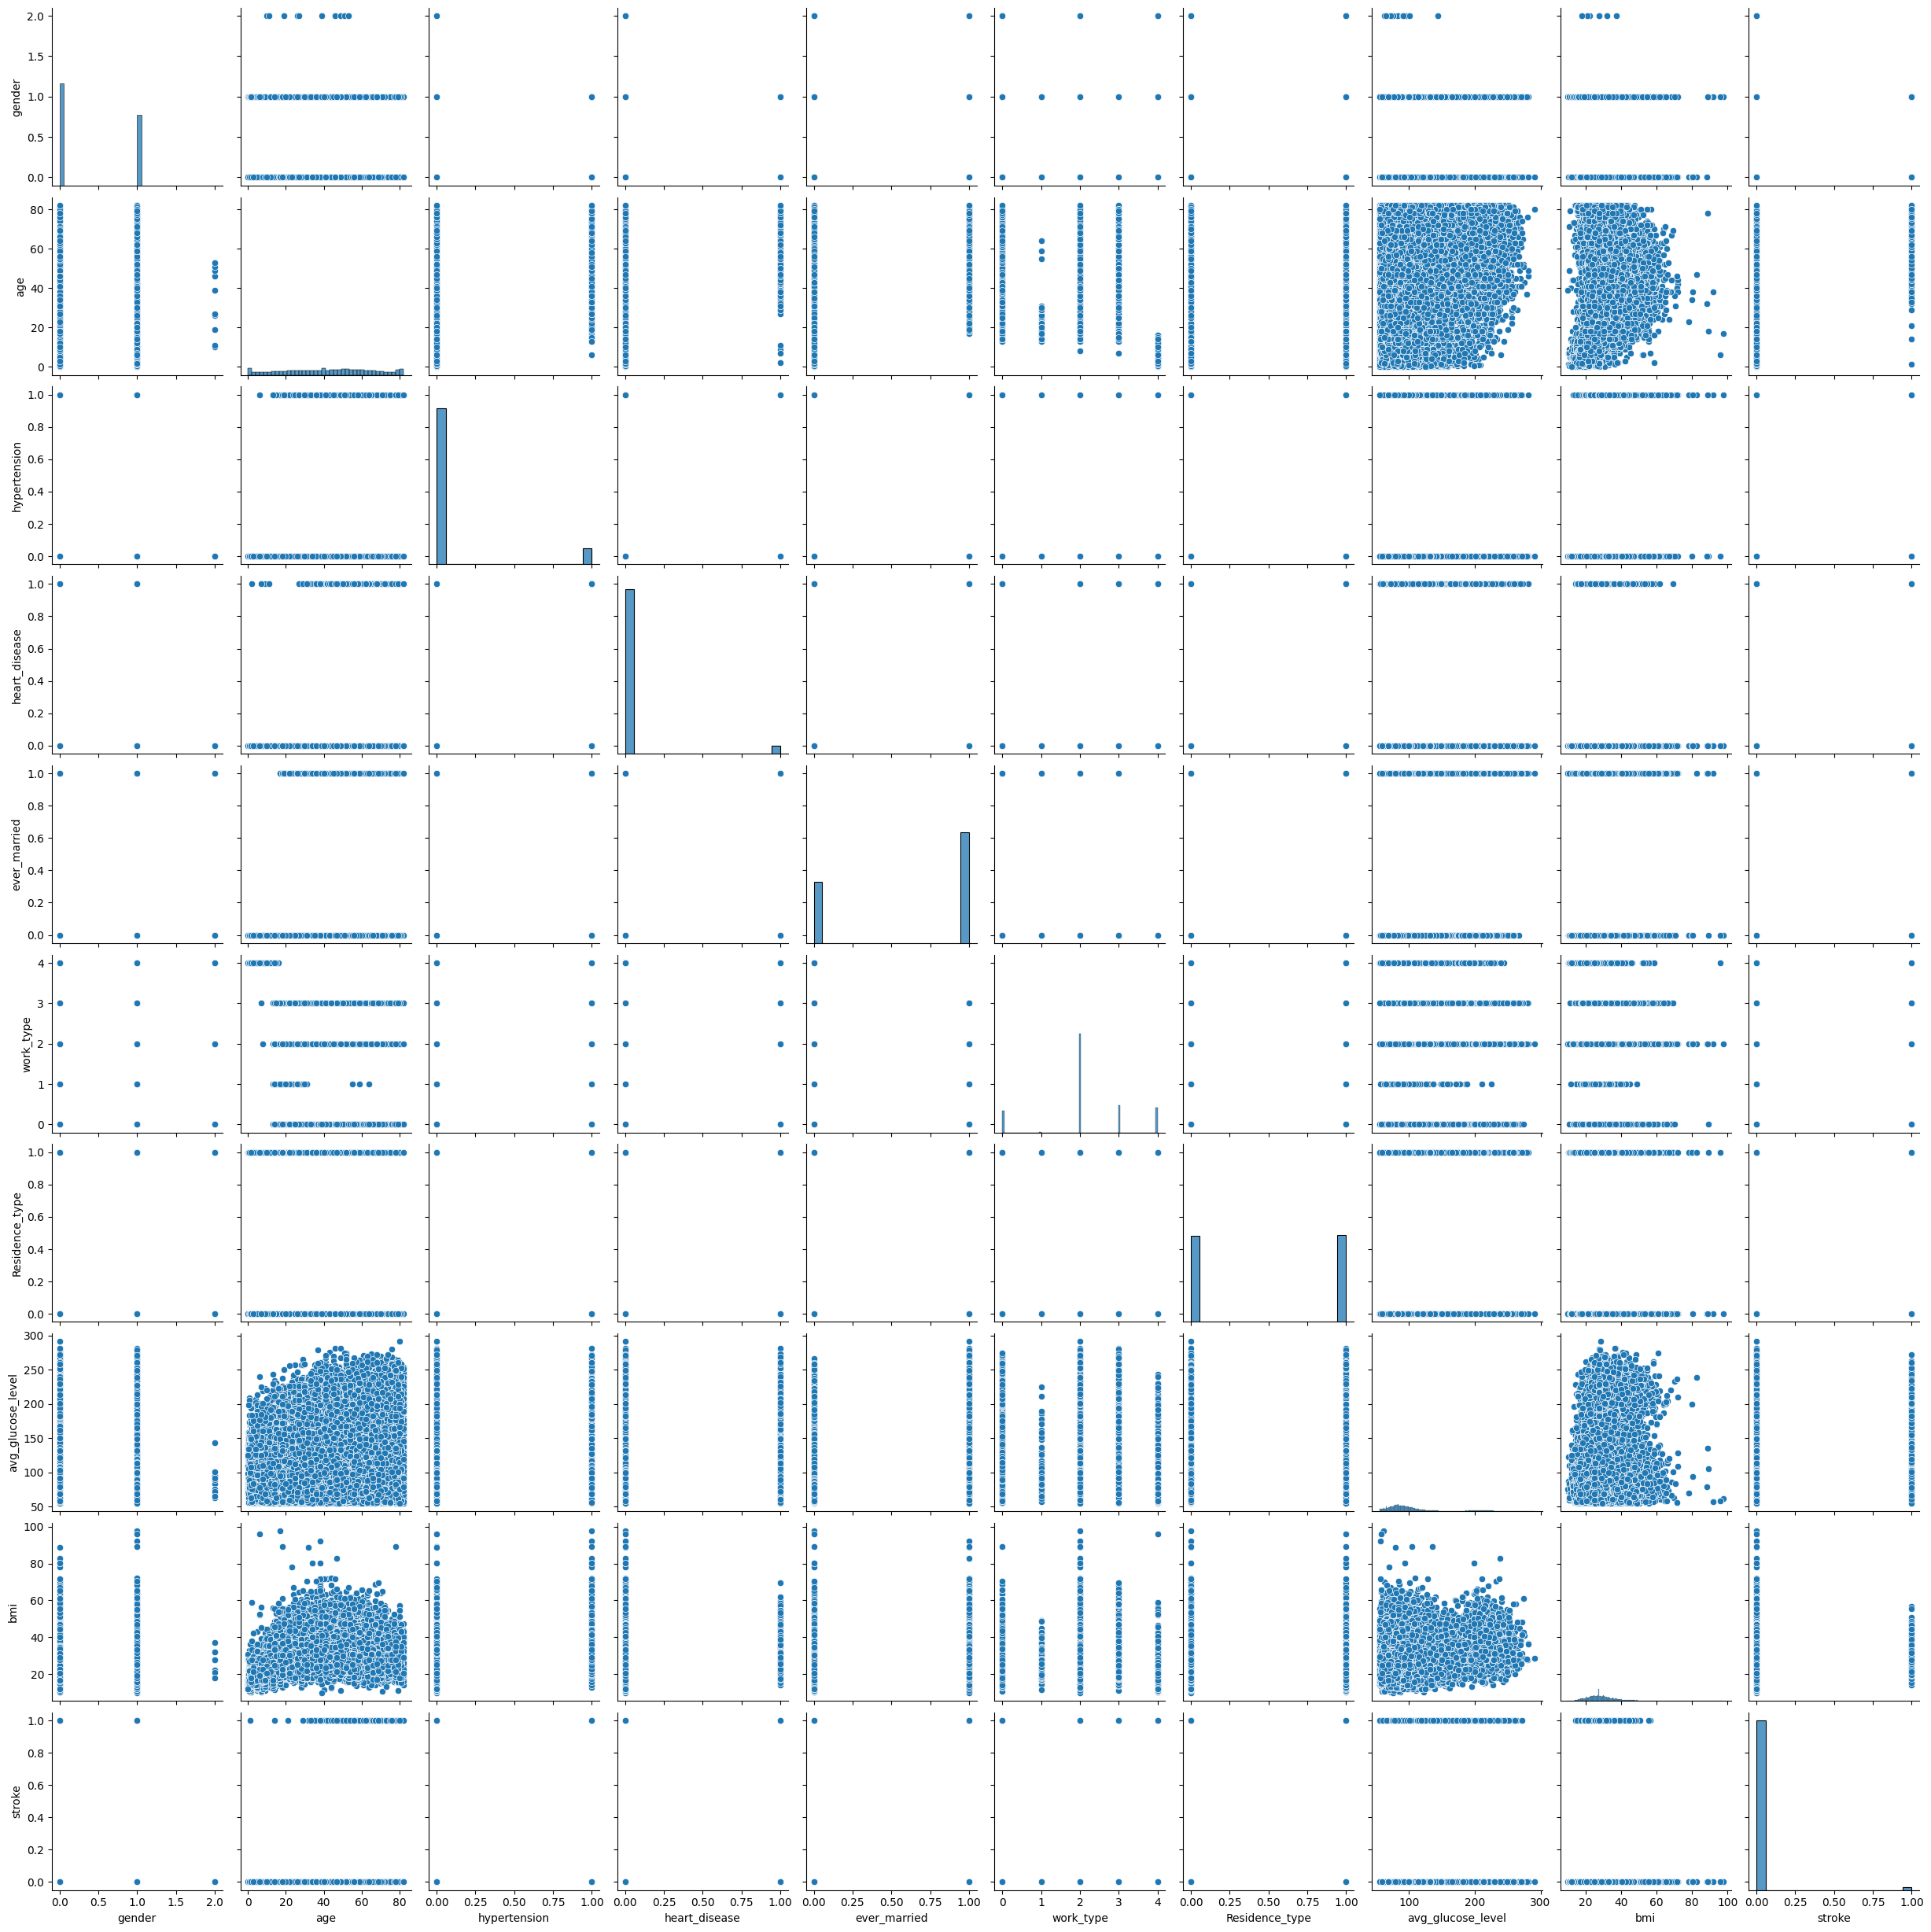

In [ ]:
sns.pairplot(df)

([<matplotlib.axis.XTick at 0x7f204d709f30>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

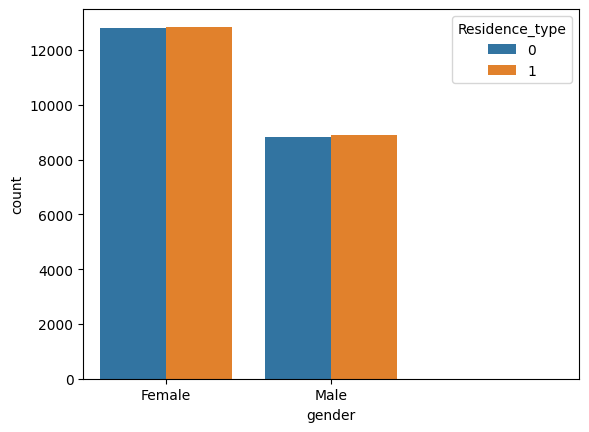

In [ ]:
gender_labels = ['Female', 'Male']

sns.countplot(x="gender", data=df, hue="Residence_type")
plt.xticks(ticks=[0, 1], labels=gender_labels)




***Based on the data, it indicates that females have a higher likelihood of experiencing a stroke compared to males. Additionally, both genders show a higher probability of having a stroke in urban areas.***